In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [3]:
path = "Electric_Consumption_And_Cost__2010_-_Feb_2023_.csv"
df = pd.read_csv(path)

Text(0.5, 0, 'Borough Name')

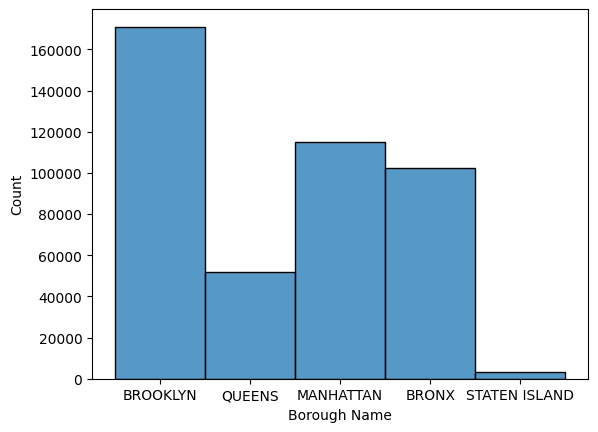

In [4]:
sns.histplot(x="Borough", data=df[~df['Borough'].isin(['FHA', 'NON DEVELOPMENT FACILITY'])])
plt.xlabel("Borough Name")

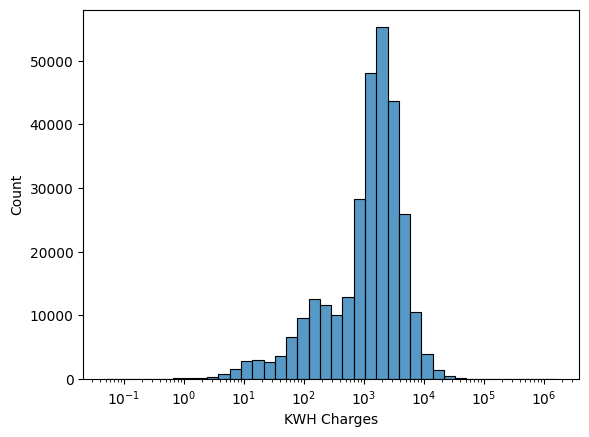

In [5]:
hist = sns.histplot(x="KWH Charges", data=df, log_scale=True, bins=40)

<Axes: xlabel='Consumption (KWH)', ylabel='Count'>

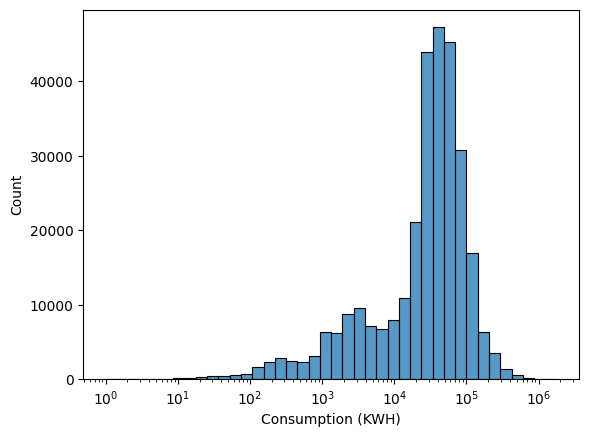

In [6]:
sns.histplot(x="Consumption (KWH)", data=df, log_scale=True, bins=40)

Text(0.5, 1.0, 'Total KWH Consumption by Borough')

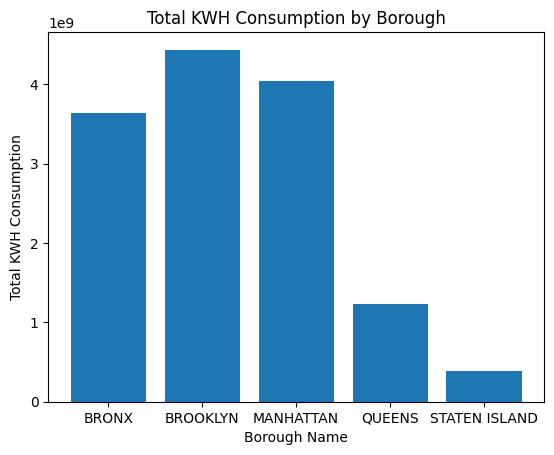

In [7]:
filtered_df = df[["Consumption (KWH)", "Current Charges"]]
filtered_df2 = df[~df['Borough'].isin(['FHA', 'NON DEVELOPMENT FACILITY'])]

borough_data = filtered_df2.groupby('Borough')['Consumption (KWH)'].sum().reset_index()

plt.bar(borough_data['Borough'], borough_data['Consumption (KWH)'])
plt.xlabel('Borough Name')
plt.ylabel('Total KWH Consumption')
plt.title('Total KWH Consumption by Borough')


([0, 1, 2, 3],
 [Text(0, 0, 'NEW YORK POWER AUTHORITY'),
  Text(1, 0, 'PSEG Long Island'),
  Text(2, 0, 'CONSOLIDATED EDISON COMPANY OF NY'),
  Text(3, 0, 'Long Island Power Authority')])

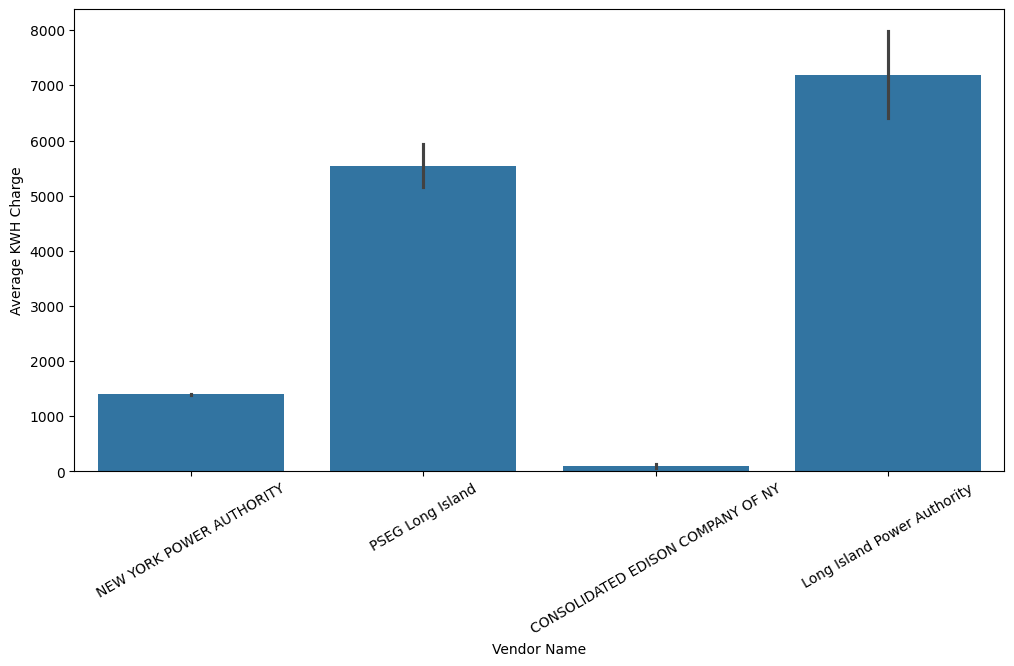

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Vendor Name', y='KWH Charges', data=df)
plt.xlabel('Vendor Name')
plt.ylabel('Average KWH Charge')
plt.xticks(rotation=30)


<Axes: >

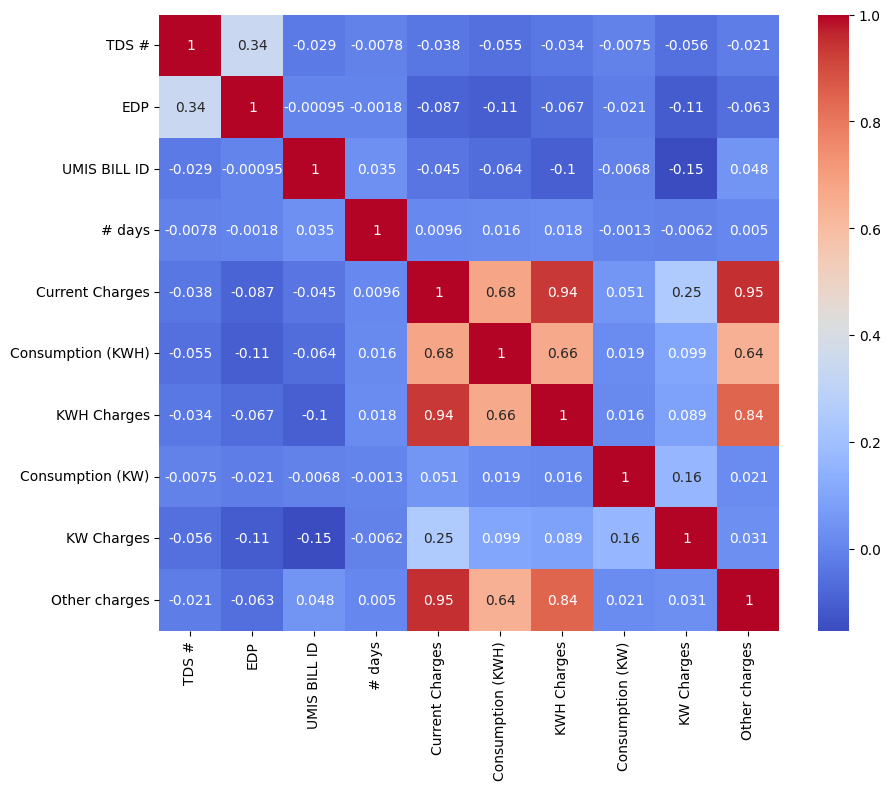

In [9]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [10]:
# -------------- Linear Regression Model --------------

encoded_df = pd.get_dummies(df, columns=["Borough"])

x = encoded_df[[col for col in encoded_df.columns if "Borough" in col or col == "Consumption (KWH)"]]
y = encoded_df["KWH Charges"]

# -------------- Build the model --------------
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
lr = linear_model.LinearRegression()



In [11]:
# -------------- train the model --------------

model = lr.fit(x_train, y_train)

# Evaluate the model

# -------------- r2 score --------------
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("r2 score: ", r2)

# -------------- mean squared error --------------
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: ", mse)

# -------------- mean absolute error --------------
mae = mean_absolute_error(y_test, y_pred)

print("Mean absolute error: ", mae)

# -------------- root mean squared error --------------
rmse = math.sqrt(mse)

print("Root mean squared error: ", rmse)


r2 score:  0.8987828754123559
Mean squared error:  610949.1616901229
Mean absolute error:  292.65006439304153
Root mean squared error:  781.6323699093602


In [12]:
print("Intercept: ", model.intercept_)

print("\n")

borough_columns = [col for col in x.columns if col.startswith("Borough")]
borough_coefficients = model.coef_[x.columns.isin(borough_columns)]
boroughs = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

for coef, col in zip(borough_coefficients, borough_columns):
    boroughName = col.split('_')[1]
    if boroughName in boroughs:
        print(f"{boroughName} Coefficient : {coef}")


Intercept:  69.75970821473129


BRONX Coefficient : -129.93827092243072
BROOKLYN Coefficient : -108.30444633106373
MANHATTAN Coefficient : -125.9527131619036
QUEENS Coefficient : -11.720208903390164
STATEN ISLAND Coefficient : 313.9938959173045


In [13]:
print("Bronx: ",model.predict([[55000, 1, 0, 0, 0, 0, 0, 0]]))
print("Brooklyn: ",model.predict([[55000, 0, 1, 0, 0, 0, 0, 0]]))
print("Manhattan: ",model.predict([[55000, 0, 0, 0, 1, 0, 0, 0]]))
print("Queens: ",model.predict([[55000, 0, 0, 0, 0, 0, 1, 0]]))
print("Staten Island: ",model.predict([[55000, 0, 0, 0, 0, 0, 0, 1]]))

Bronx:  [2524.57189337]
Brooklyn:  [2546.20571796]
Manhattan:  [2528.55745113]
Queens:  [2642.78995539]
Staten Island:  [2968.50406021]


C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWa